In [28]:
import gym
import random
from gym.envs.registration import register
register(
    id='D4x4-FrozenLake-v0',
    entry_point='gym.envs.toy_text.frozen_lake:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': True})
env = gym.make('D4x4-FrozenLake-v0')

In [81]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
import numpy as np
def fancy_visual(value_func,policy_int):    
    grid = 4
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped=np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap=cmap, vmax=1.1,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter=0
    for j in range(0, 4):
        for i in range(0, 4):
            if policy_int[counter]==1:
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif policy_int[counter]==3:
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif policy_int[counter]==0:
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    plt.title('Heatmap of policy iteration with value function values and directions')
    print('Value Function',value_func)
    print('Policy',policy_int)
    plt.show()

def plot(name, y, window=1):
    i = 0
    new_y = []
    while i < len(y):
        new_y.append(np.mean(y[i: i+window]))
        i += window
    plt.plot(new_y)
    plt.ylabel(name)
    plt.show()

In [175]:
max_step = 50
n_episodes = 10000
gamma = 0.9
alpha = 0.2
epsilon = 0.3
# copied from policy iteration
Q_star = np.asarray([[0.06888533, 0.06664272, 0.06664272, 0.05975346],
       [0.0390881 , 0.0429871 , 0.04074449, 0.06140985],
       [0.07440632, 0.06882547, 0.07272446, 0.05748539],
       [0.03906264, 0.03906264, 0.03348179, 0.05580353],
       [0.09184947, 0.07118411, 0.06429485, 0.04821997],
       [0.        , 0.        , 0.        , 0.        ],
       [0.11220635, 0.08988461, 0.11220635, 0.02232174],
       [0.        , 0.        , 0.        , 0.        ],
       [0.07118411, 0.11787763, 0.10180275, 0.14543225],
       [0.15760958, 0.24749419, 0.20386469, 0.1335141 ],
       [0.29961565, 0.26595382, 0.22536751, 0.10790996],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.18822822, 0.30568577, 0.3799339 , 0.26595382],
       [0.39557038, 0.6390191 , 0.61492363, 0.53719803],
       [0.        , 0.        , 0.        , 0.        ]])

Q = np.zeros((env.nS, env.nA))
rewards = []
diff = []
for episode in range(n_episodes):
    # naive hyper-parameter tuning
    if episode == 2000:
        epsilon = 0.05
        alpha = 0.05
    elif episode == 4000:
        epsilon = 0.0001
        alpha = 0.001

    state = env.reset() # Reset the env
    cum_reward = 0
#     print('Starting Episode ', episode)
    for step in range(max_step):
        # epsilon greedy exploration
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])
            
        n_state, reward, terminal, _ = env.step(action) # Take a step

        n_action = np.argmax(Q[n_state])
        Q[state][action] += alpha*(reward + gamma*Q[n_state][n_action]
                                   - Q[state][action])
        cum_reward += reward

#         print('State:', state, 'Action:', action, 'Reward:',
#               reward, 'Next State:', n_state, 'Terminal:', terminal)
        state = n_state    
        if terminal:
            break
    rewards.append(cum_reward)
    diff.append(np.mean(np.square(Q-Q_star)))

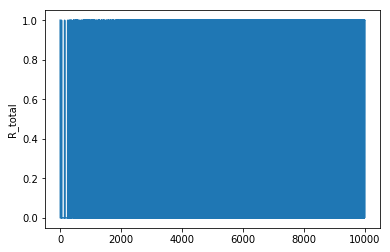

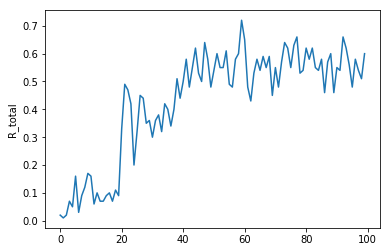

In [176]:
plot('R_total', rewards)
plot('R_total', rewards, 100)

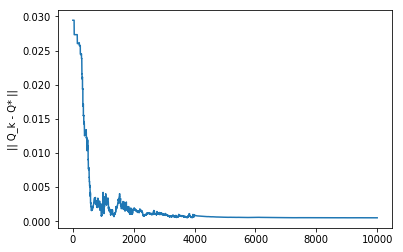

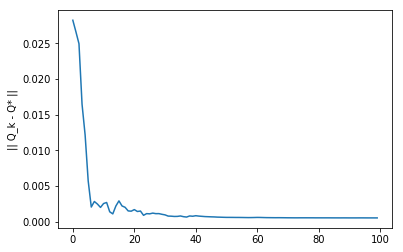

In [177]:
plot('|| Q_k - Q* ||', diff)
plot('|| Q_k - Q* ||', diff, 100)

Value Function [0.07240694659574548, 0.05975670142463918, 0.07026846107328259, 0.04564658833972232, 0.0958734406437046, 0.0, 0.11516200174713724, 0.0, 0.15239058527112587, 0.25717135940059177, 0.3127066888369163, 0.0, 0.0, 0.38780498352950954, 0.6429429309333297, 0.0]
Policy [0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0]


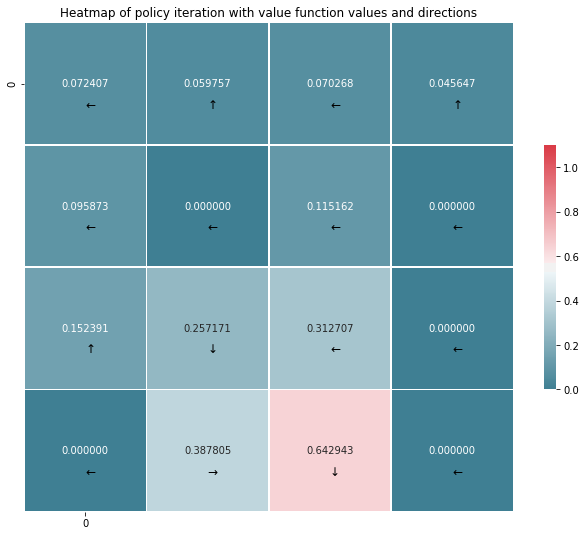

In [179]:
policy = [np.argmax(Q[s]) for s in range(env.nS)]
V = [max(Q[s]) for s in range(env.nS)]
fancy_visual(V, policy)

In [180]:
print('Q function')
print(Q)

Q function
[[0.07240695 0.0619945  0.06389773 0.06022286]
 [0.03520335 0.03927447 0.02830584 0.0597567 ]
 [0.07026846 0.05310989 0.05419963 0.05257434]
 [0.02287754 0.03762336 0.0287034  0.04564659]
 [0.09587344 0.0683286  0.07507239 0.04901782]
 [0.         0.         0.         0.        ]
 [0.115162   0.04667388 0.06968674 0.00792308]
 [0.         0.         0.         0.        ]
 [0.07999554 0.12514478 0.10928499 0.15239059]
 [0.15819648 0.25717136 0.20158731 0.12527438]
 [0.31270669 0.20585236 0.15516771 0.11117442]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.21812345 0.27904051 0.38780498 0.33723691]
 [0.40822865 0.64294293 0.53290241 0.47286078]
 [0.         0.         0.         0.        ]]
